In [22]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
G = nx.Graph()
G.add_edges_from(
    [('A', 'B'),('A', 'C'),('A','I'),
     ('B', 'H'),('B', 'G'),('B', 'F'),('B', 'C'),
     ('C', 'G'),('D', 'B'),('E', 'C'),('E', 'F'),
     ('F','A'),('F','L')])

In [24]:
grafo=G.nodes(data=False)
len_grafo=len(grafo)
print('Total nodes:'+str(len_grafo))
print(grafo)

Total nodes:10
['A', 'B', 'C', 'I', 'H', 'G', 'F', 'D', 'E', 'L']


In [25]:
u=0
for line in nx.generate_edgelist(G, data=False):
    u=u+1
    print(line)

print('Total edge:'+str(u))

A B
A C
A I
A F
B H
B G
B F
B C
B D
C G
C E
F E
F L
Total edge:13


In [26]:
print('Paths matrix')
mat=np.zeros((len(grafo),len(grafo)))

m=[]
for u in grafo:
    for i in grafo:
        r=nx.shortest_path_length(G, source=u, target=i)
        m.append(r)
m=np.reshape(m,(len_grafo,len_grafo))
#print(m)
dataframe=pd.DataFrame(m,columns=grafo,index=grafo)
print(dataframe)

Paths matrix
   A  B  C  I  H  G  F  D  E  L
A  0  1  1  1  2  2  1  2  2  2
B  1  0  1  2  1  1  1  1  2  2
C  1  1  0  2  2  1  2  2  1  3
I  1  2  2  0  3  3  2  3  3  3
H  2  1  2  3  0  2  2  2  3  3
G  2  1  1  3  2  0  2  2  2  3
F  1  1  2  2  2  2  0  2  1  1
D  2  1  2  3  2  2  2  0  3  3
E  2  2  1  3  3  2  1  3  0  2
L  2  2  3  3  3  3  1  3  2  0


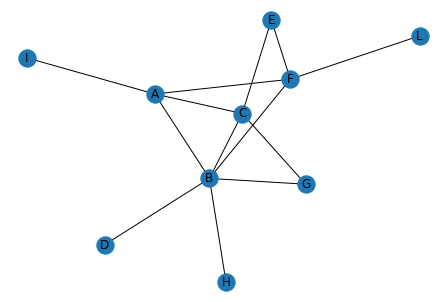

End!


In [27]:
#plot do grafo
nx.draw(G, with_labels=True)
plt.show()
print('End!')

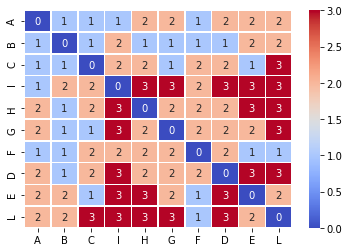

In [30]:
sns.heatmap(dataframe, cmap='coolwarm', linewidths=0.5, annot=True)